In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
df=pd.read_excel(r"C:\Users\prach\Downloads\Customer Purchase Data.xlsx")
df.head()

,Customer,Age,Annual_Income,Browsing_Time,Purchase
0,1,22,25,3.2,0
1,2,25,28,4.5,0
2,3,28,35,5.0,0
3,4,30,40,6.2,1
4,5,32,42,7.0,1


In [25]:

x=df[['Age','Annual_Income']] #independent variable
y=df['Purchase'] #dependent variable

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#Train logistic regression model
model=LogisticRegression()
model.fit(x_train,y_train)
#Prediction
y_pred=model.predict(x_test)
#Example input: Age=30 ,Income=45, Browsing_Time=7.0
new_customer=pd.DataFrame([[30,45]],columns=['Age','Annual_Income'])
prediction=model.predict(new_customer)
probability=model.predict_proba(new_customer)
print("\nPrediction :",prediction[0])
print("Probability of buying:",probability[0][1])





Prediction : 1
Probability of buying: 0.9939306851771587


C:\Users\prach\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


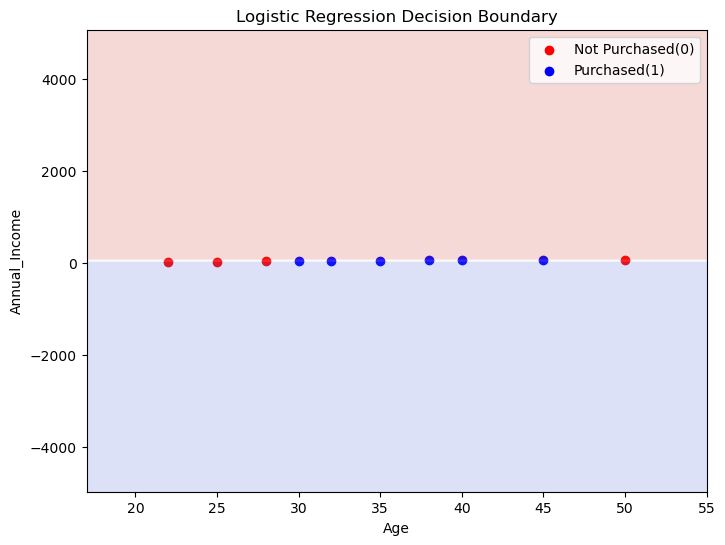

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,6))
plt.scatter(df[df['Purchase']==0]['Age'],df[df['Purchase']==0]['Annual_Income'],color='red',label='Not Purchased(0)')
plt.scatter(df[df['Purchase']==1]['Age'],df[df['Purchase']==1]['Annual_Income'],color='blue',label='Purchased(1)')
x_min,x_max=x['Age'].min()-5,x['Age'].max()+5
y_min,y_max=x['Annual_Income'].min()-5000,x['Annual_Income'].max()+5000
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha=0.2,cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Annual_Income')
plt.title('Logistic Regression Decision Boundary')
plt.legend()